In [ ]:
!pip install --upgrade tensorflow

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import keras

import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import nibabel as nib
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/"
train_folder = BASE_PATH + "imagesTr/"
labels_folder = BASE_PATH + "labelsTr/"

In [ ]:
import pandas as pd

df = pd.read_csv(BASE_PATH + "heart_sample.csv")
df.head()

Unnamed: 0                                         image_path  \
0          56  /content/drive/MyDrive/Dissertation/Medical_Im...   
1          37  /content/drive/MyDrive/Dissertation/Medical_Im...   
2          67  /content/drive/MyDrive/Dissertation/Medical_Im...   
3          79  /content/drive/MyDrive/Dissertation/Medical_Im...   
4          80  /content/drive/MyDrive/Dissertation/Medical_Im...   

                                           mask_path  
0  /content/drive/MyDrive/Dissertation/Medical_Im...  
1  /content/drive/MyDrive/Dissertation/Medical_Im...  
2  /content/drive/MyDrive/Dissertation/Medical_Im...  
3  /content/drive/MyDrive/Dissertation/Medical_Im...  
4  /content/drive/MyDrive/Dissertation/Medical_Im...

In [ ]:
df.shape

(100, 3)

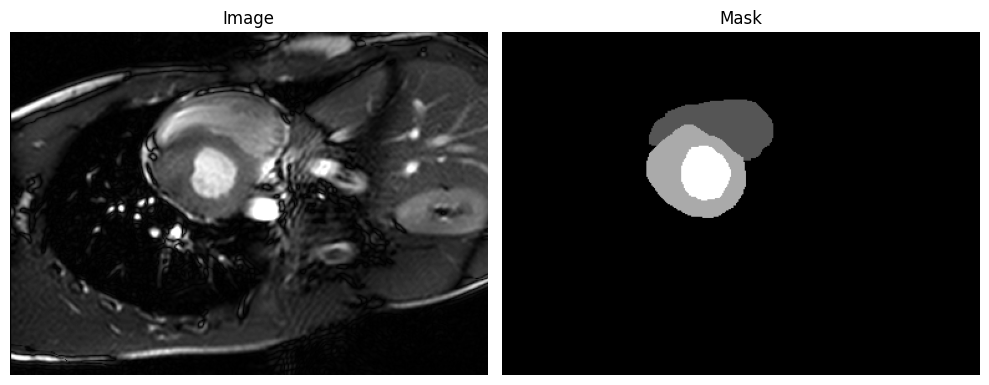

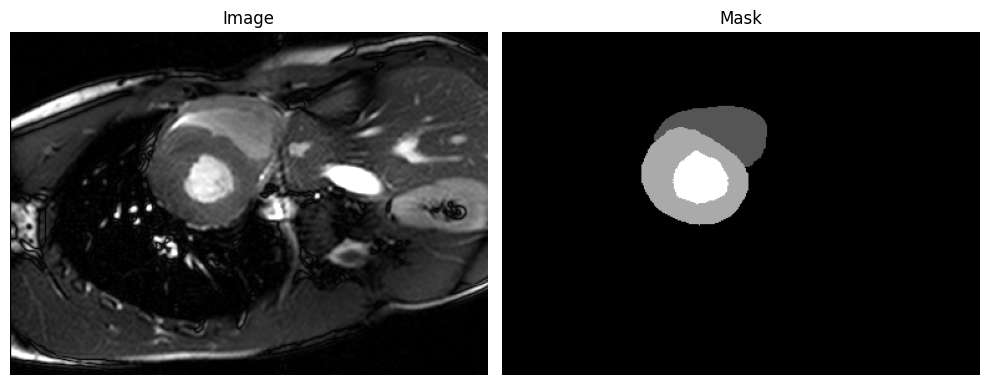

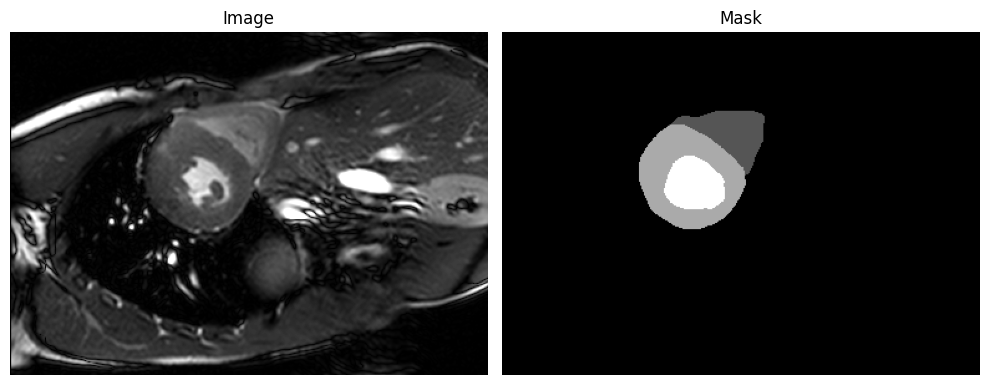

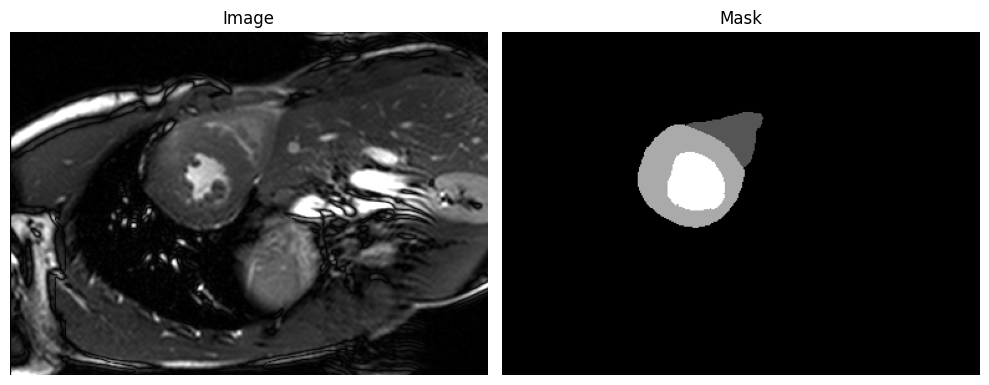

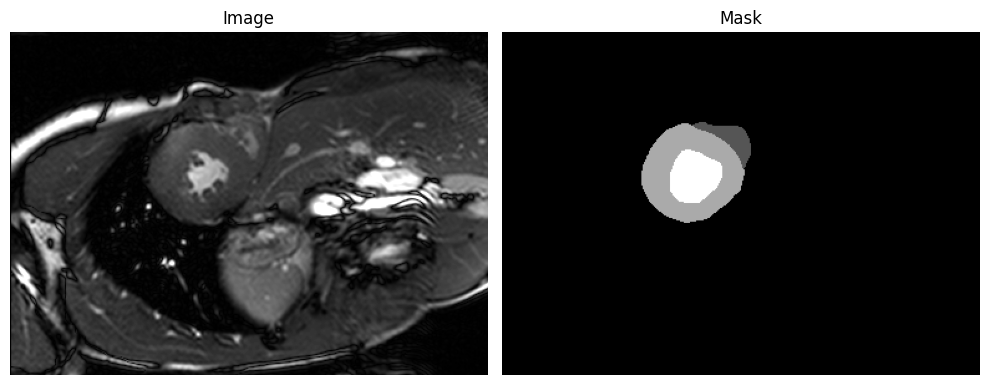

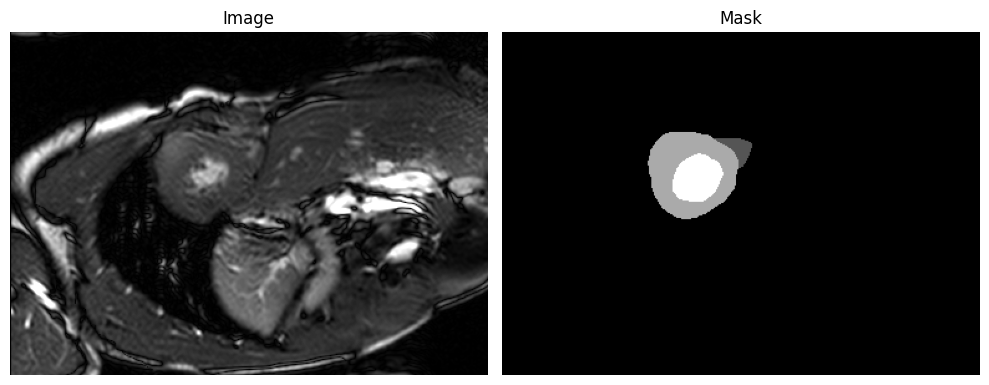

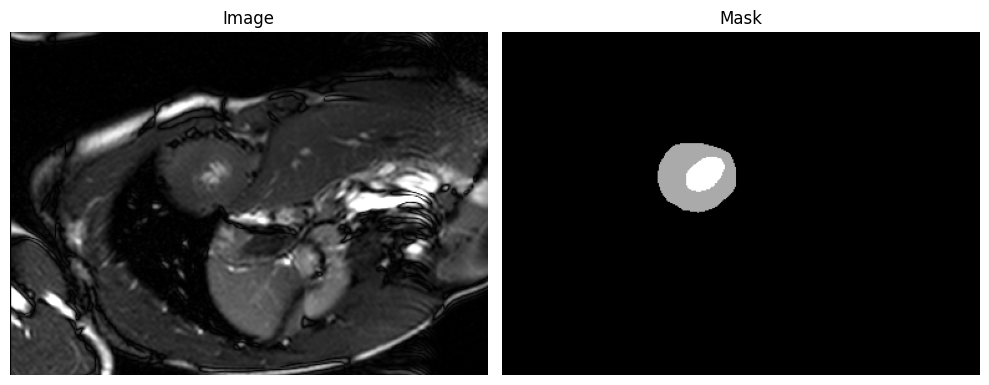

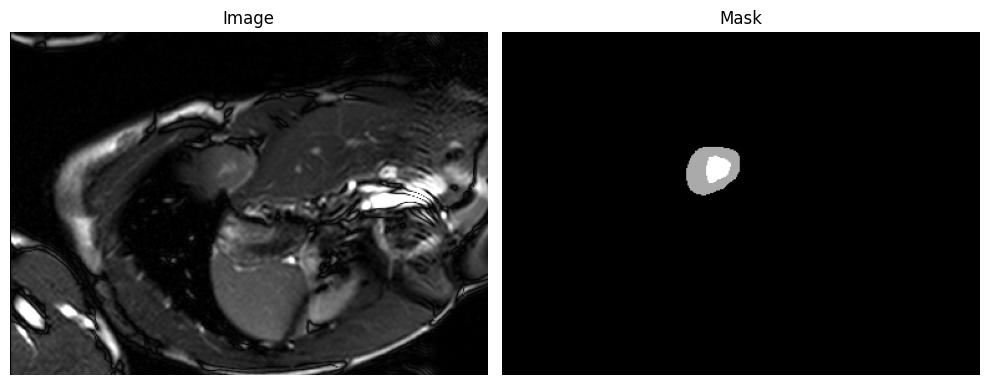

In [ ]:
image_temp = image_array[0]
mask_temp = mask_array[0]
slice_index = 7  # Change this to the desired slice index
for i in range(8):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(image_temp[:, :, i], cmap='gray')
  plt.title("Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(mask_temp[:, :, i], cmap='gray')
  plt.title("Mask")
  plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
# df.to_csv(data_path+"heart_sample.csv")
# df_temp.to_csv(data_path + "heart.csv")

In [ ]:
df = pd.read_csv(BASE_PATH+"heart_sample.csv")

In [ ]:
df.head()

Unnamed: 0                                         image_path  \
0          56  /content/drive/MyDrive/Dissertation/Medical_Im...   
1          37  /content/drive/MyDrive/Dissertation/Medical_Im...   
2          67  /content/drive/MyDrive/Dissertation/Medical_Im...   
3          79  /content/drive/MyDrive/Dissertation/Medical_Im...   
4          80  /content/drive/MyDrive/Dissertation/Medical_Im...   

                                           mask_path  
0  /content/drive/MyDrive/Dissertation/Medical_Im...  
1  /content/drive/MyDrive/Dissertation/Medical_Im...  
2  /content/drive/MyDrive/Dissertation/Medical_Im...  
3  /content/drive/MyDrive/Dissertation/Medical_Im...  
4  /content/drive/MyDrive/Dissertation/Medical_Im...

In [ ]:
def crop(img, msk, randomize):
    """
    Randomly crop the image and mask
    """

    slices = []

    # Do we randomize?
    is_random = randomize and np.random.rand() > 0.5
    min = 999999

    for idx in range(len(img.shape)):  # Go through each dimension
        cropLen = crop_dim[idx]
        imgLen = img.shape[idx]
        if imgLen < min:
          min = imgLen

        start = (imgLen-cropLen)//2

        ratio_crop = 0.20  # Crop up this this % of pixels for offset
        # Number of pixels to offset crop in this dimension
        offset = int(np.floor(start*ratio_crop))

        if offset > 0:
            if is_random:
                start += np.random.choice(range(-offset, offset))
                if ((start + cropLen) > imgLen):  # Don't fall off the image
                    start = (imgLen-cropLen)//2
        else:
            start = 0

        slices.append(slice(start, start+cropLen))
        # print("hello")
    print(min)
    return img[tuple(slices)], msk[tuple(slices)]

In [ ]:
crop_dim = (128, 128, 1)

In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from skimage.transform import resize


# Initialize lists to store 2D image and mask arrays
image_slices_array = []
mask_slices_array = []
new_target_height = 128
new_target_width = 128

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    image_path = row['image_path']
    mask_path = row['mask_path']
    if os.path.exists(mask_path):
        image_img = nib.load(image_path)
        mask_img = nib.load(mask_path)

        image_data = image_img.get_fdata()
        mask_data = mask_img.get_fdata()

        # Loop through the third dimension and append each slice to the arrays
        for slice_index in range(image_data.shape[2]):
            # print("helloyou")
            image_slice = image_data[:, :, slice_index]
            mask_slice = mask_data[:, :, slice_index]

            number_output_classes = 4
            msk_temp = np.zeros(list(mask_slice.shape) + [number_output_classes])
            # print("hello22222")
            for channel in range(number_output_classes):
                msk_temp[mask_slice==(channel),channel] = 1.0
            # print("yolo2")
            mask_slice = msk_temp
            image_slice =
            image_slice, mask_slice = crop(image_slice, mask_slice, randomize = True)

            image_slices_array.append(image_slice)
            mask_slices_array.append(mask_slice)
            print("append slice ", slice_index+1)
    else:
        print(f"Mask not found for image: {image_path}")

# Convert the lists to arrays
image_slices_array = np.array(image_slices_array)
mask_slices_array = np.array(mask_slices_array)

# Save the arrays as NumPy binary files
np.save(os.path.join(BASE_PATH, "image_slices_array_final_1.npy"), image_slices_array)
np.save(os.path.join(BASE_PATH, "mask_slices_array_final_1.npy"), mask_slices_array)
print("Saved arrays")


216
append slice  1
216
append slice  2
216
append slice  3
216
append slice  4
216
append slice  5
216
append slice  6
216
append slice  7
216
append slice  8
216
append slice  9
216
append slice  1
216
append slice  2
216
append slice  3
216
append slice  4
216
append slice  5
216
append slice  6
216
append slice  7
216
append slice  8
154
append slice  1
154
append slice  2
154
append slice  3
154
append slice  4
154
append slice  5
154
append slice  6
154
append slice  7
154
append slice  8
154
append slice  9
154
append slice  10
154
append slice  11
154
append slice  12
154
append slice  13
154
append slice  14
154
append slice  15
154
append slice  16
240
append slice  1
240
append slice  2
240
append slice  3
240
append slice  4
240
append slice  5
240
append slice  6
240
append slice  7
240
append slice  8
240
append slice  9
240
append slice  10
216
append slice  1
216
append slice  2
216
append slice  3
216
append slice  4
216
append slice  5
216
append slice  6
216
append s

In [ ]:
import numpy as np

# Load the numpy array from a file
image_array = np.load(BASE_PATH + 'image_slices_array_final_1.npy')
mask_array = np.load(BASE_PATH + 'mask_slices_array_final_1.npy')

# Now you can work with the loaded_array
print(image_array.shape)
print(mask_array.shape)

(946, 128, 128)
(946, 128, 128, 4)


In [ ]:
np.max(image_array)

3049.0

In [ ]:
def normalize_image(image_array):
    """
    Normalize the image array to a specific range, e.g., [0, 1].
    """
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    normalized_image_array = (image_array - min_val) / (max_val - min_val)
    return normalized_image_array

In [ ]:
for i in range(len(image_array)):
  image_array[i] = normalize_image(image_array[i])

print(np.max(image_array))


1.0


In [ ]:
colormap = np.array([
    [0, 0, 0],
    [62, 63, 64],  # Label 1 (red)
    [134, 134, 135],  # Label 2 (green)
    [230, 230, 230]   # Label 3 (blue)
], dtype=np.uint8)

def map_onehot_to_color(one_hot_mask, colormap):
    colored_image = np.dot(one_hot_mask, colormap)
    colored_image = colored_image.astype(np.uint8)

    return colored_image

IndexError: ignored

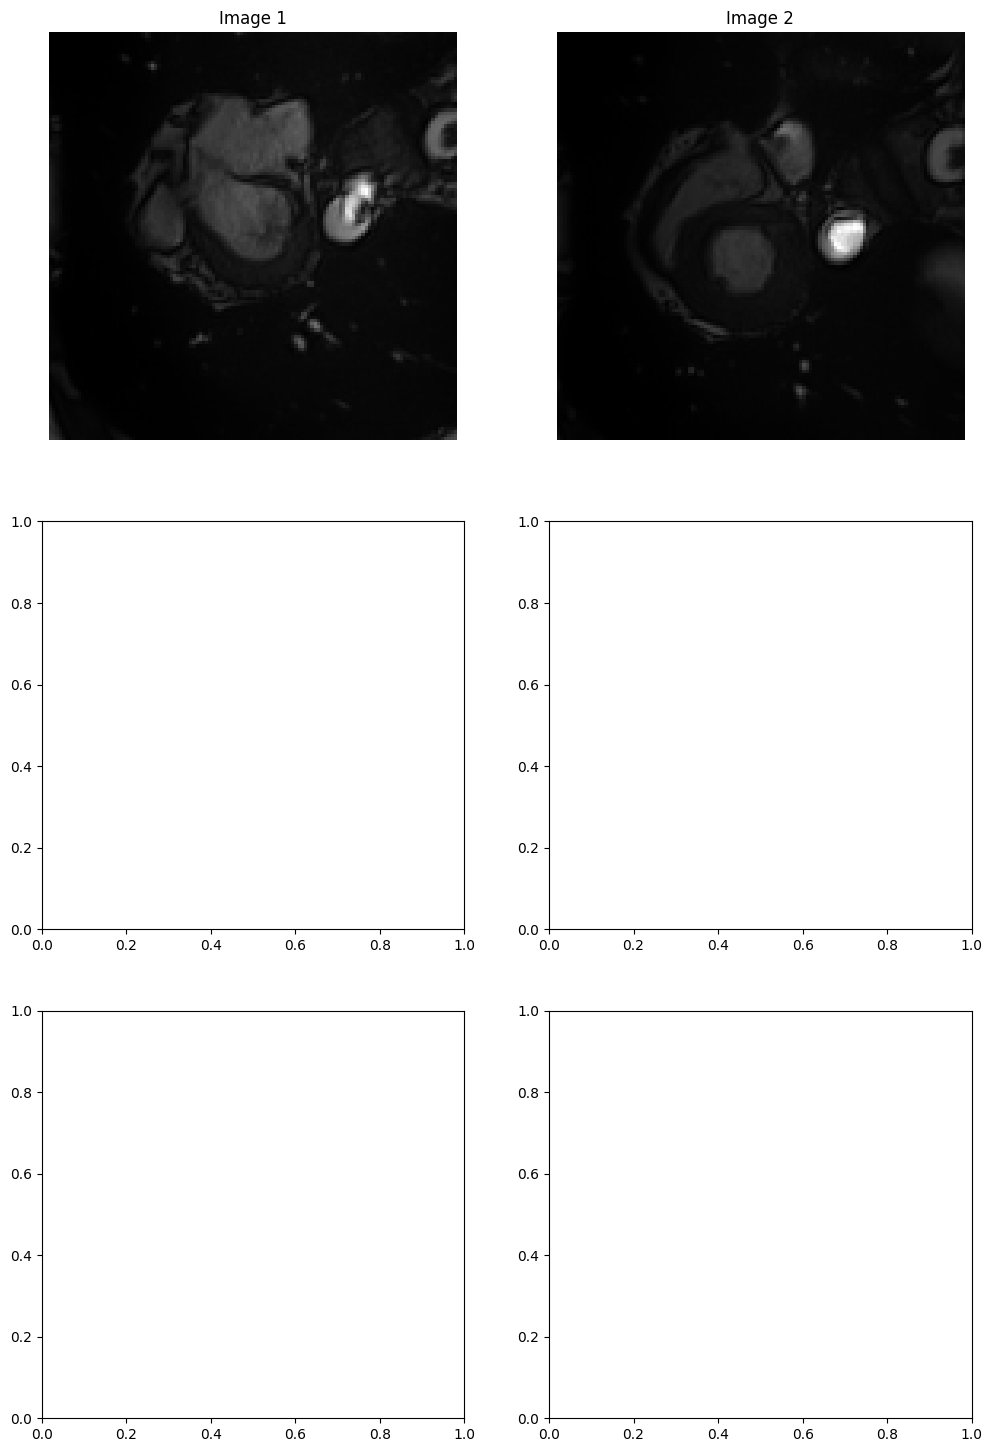

In [ ]:
# Create a figure with multiple rows and columns
num_rows = 3
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 18))

for idx, image in enumerate(image_array[:3]):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    axs[row_idx, col_idx].imshow(image, cmap='gray')
    axs[row_idx, col_idx].set_title(f"Image {idx + 1}")
    axs[row_idx, col_idx].axis('off')

    axs[row_idx, col_idx + 1].imshow(map_onehot_to_color(mask_array[idx], colormap), cmap='gray')
    axs[row_idx, col_idx + 1].set_title(f"Mask {idx + 1}")
    axs[row_idx, col_idx + 1].axis('off')
plt.tight_layout()

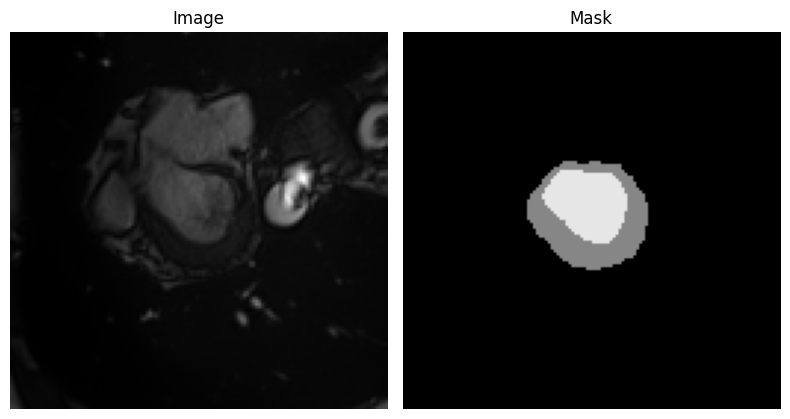

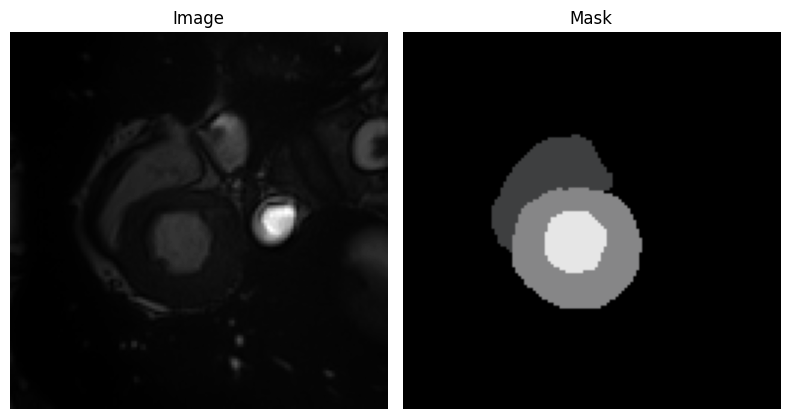

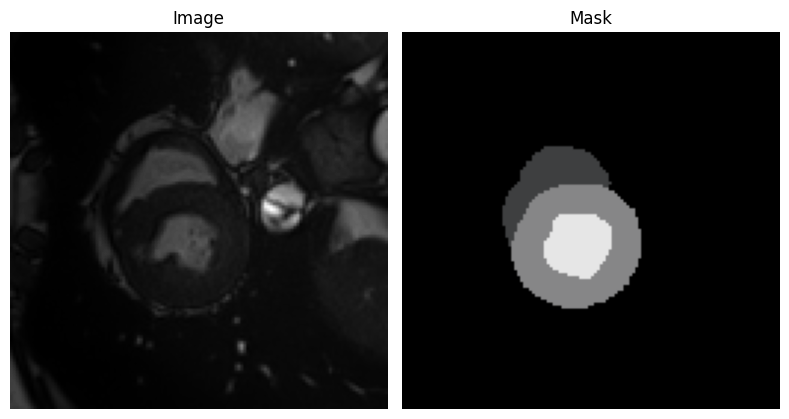

In [ ]:
import matplotlib.pyplot as plt


for idx, image in enumerate(image_array[:3]):
  plt.figure(figsize=(8, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title("Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(map_onehot_to_color(mask_array[idx], colormap), cmap='gray')
  plt.title("Mask")
  plt.axis('off')

  plt.tight_layout()
# Adjust spacing between subplots




In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have 'normalized_image_data' and 'normalized_mask_data' as your data arrays

# Split the data into training and testing sets
# You can adjust the 'test_size' parameter to specify the proportion of the dataset used for testing
# The 'random_state' parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(image_array, mask_array, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Training samples: ", len(X_train) ,"Testing samples: ", len(X_test), "Val Samples: ", len(X_val))

Training samples:  756 Testing samples:  95 Val Samples:  95


## Model Training

### Loss Function

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

## Block Functions

In [ ]:
def conv_block(x, filter_size, size, dropout, batch_norm=False):
    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):
    # Repeats the elements of a tensor along an axis by a factor of rep.
    return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def res_conv_block(x, filter_size, size, dropout, batch_norm=False):
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm:
        conv = layers.BatchNormalization(axis=3)(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)
    return res_path

def gating_signal(input, out_size, batch_norm=False):
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)
    shape_theta_x = K.int_shape(theta_x)

    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(
        inter_shape,
        (3, 3),
        strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
        padding='same')(phi_g)

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(
        size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn


## Model Architecture

In [ ]:
def UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters


    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers

    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, conv_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7

    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, conv_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8

    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, conv_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9

    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, conv_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model
    model = models.Model(inputs, conv_final, name="UNet")
    print(model.summary())
    return model

def Res_UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Res-UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters


    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers

    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, conv_16], axis=3)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7

    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, conv_32], axis=3)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8

    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, conv_64], axis=3)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9

    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, conv_128], axis=3)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model
    model = models.Model(inputs, conv_final, name="UNet")
    print(model.summary())
    return model

def Attention_UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Attention UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="Attention_UNet")
    return model

def Attention_ResUNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):
    '''
    Rsidual UNet, with attention

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model


### Callback Functions

In [ ]:
#callbacks
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=20
                             )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )
# save the best model with lower validation loss
unet_checkpointer = ModelCheckpoint(filepath=BASE_PATH+"Unet-raw-checkpoint-focal-cat_final_final.hdf5",
                               verbose=1,
                               save_best_only=True
                              )
# save the best model with lower validation loss
res_unet_checkpointer = ModelCheckpoint(filepath=BASE_PATH+"Res-Unet-checkpoint_final_final.hdf5",
                               verbose=1,
                               save_best_only=True
                              )
# save the best model with lower validation loss
att_res_unet_checkpointer = ModelCheckpoint(filepath=BASE_PATH+"Att-Res-Unet-checkpoint_final_final.hdf5",
                               verbose=1,
                               save_best_only=True
                              )

### UNET model

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
unet_model = UNet(input_shape)
unet_model.compile(optimizer=Adam(lr = 1e-2), loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=2.0),
              metrics=['accuracy', jacard_coef, dice_coef])


print(unet_model.summary())

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0]

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0]

In [ ]:
start1 = datetime.now()
unet_history = unet_model.fit(X_train, y_train,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    shuffle=False,
                    callbacks = [unet_checkpointer, earlystopping, reduce_lr],
                    epochs=100)

stop1 = datetime.now()
#Execution time of the model
execution_time_Unet = stop1-start1
print("UNet execution time is: ", execution_time_Unet)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 0.1370 - accuracy: 0.8376 - jacard_coef: 0.2212 - dice_coef: 0.3618
Epoch 1: val_loss improved from inf to 3.79158, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Unet-raw-checkpoint-focal-cat_final_final.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 69s 1s/step - loss: 0.1370 - accuracy: 0.8376 - jacard_coef: 0.2212 - dice_coef: 0.3618 - val_loss: 3.7916 - val_accuracy: 0.0580 - val_jacard_coef: 0.0298 - val_dice_coef: 0.0579 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 0.0932 - accuracy: 0.9265 - jacard_coef: 0.2581 - dice_coef: 0.4102
Epoch 2: val_loss improved from 3.79158 to 3.76981, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Unet-raw-checkpoint-focal-cat_final_final.hdf5
24/24 [==============================] - 13s 532ms/step - loss: 0.0932 - accuracy: 0.9265 - jacard_coef: 0.2581 - dice_coef: 0.4102 - val_loss: 3.7698 - val_accuracy: 0.0516 - val_jacard_coef: 0.0265 - val_dice_coef: 0.0516 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9481 - jacard_coef: 0.2779 - dice_coef: 0.4349
Epoch 3: val_loss improved from 3.76981 to 1.00668, saving mode

In [ ]:
unet_model.save(BASE_PATH + 'UNet_100epochs_focal_c_entropy_final_final.hdf5')

## Res-UNET Model

In [ ]:
res_unet_model = Res_UNet(input_shape)
# res_unet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2),
#               metrics=['accuracy', jacard_coef])

res_unet_model.compile(optimizer=Adam(lr = 1e-2), loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=2.0),
              metrics=['accuracy', jacard_coef])


print(res_unet_model.summary())

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_19 (Ba  (None, 128, 128, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_19 (Activation)  (None, 128, 128, 64)         0         ['batch_normalization_19[0]

None
Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_19 (Ba  (None, 128, 128, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_19 (Activation)  (None, 128, 128, 64)         0         ['batch_normalization_

In [ ]:
start2 = datetime.now()
res_unet_history = res_unet_model.fit(X_train, y_train,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    shuffle=False,
                    callbacks = [res_unet_checkpointer, earlystopping, reduce_lr],
                    epochs=100)

stop2 = datetime.now()
#Execution time of the model
execution_time_Res_Unet = stop2-start2
print("Res-UNet execution time is: ", execution_time_Res_Unet)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.8090 - jacard_coef: 0.2095
Epoch 1: val_loss improved from inf to 3.77455, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Res-Unet-checkpoint_final_final.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 39s 781ms/step - loss: 0.1401 - accuracy: 0.8090 - jacard_coef: 0.2095 - val_loss: 3.7746 - val_accuracy: 0.0484 - val_jacard_coef: 0.0250 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 0.0895 - accuracy: 0.9383 - jacard_coef: 0.2625
Epoch 2: val_loss improved from 3.77455 to 2.45090, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Res-Unet-checkpoint_final_final.hdf5
24/24 [==============================] - 16s 671ms/step - loss: 0.0895 - accuracy: 0.9383 - jacard_coef: 0.2625 - val_loss: 2.4509 - val_accuracy: 0.2169 - val_jacard_coef: 0.0737 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9592 - jacard_coef: 0.2855
Epoch 3: val_loss improved from 2.45090 to 1.31831, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Res-Unet-checkpoint_final_final.hdf5
24/24 [=========

In [ ]:
res_unet_model.save(BASE_PATH + 'Res_UNet_100epochs_focal_c_entropy_final_final.hdf5')

### Attention Res-Unet

In [ ]:
att_res_unet_model = Attention_ResUNet(input_shape)
att_res_unet_model.compile(optimizer=Adam(lr = 1e-2), loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=2.0),
              metrics=['accuracy', jacard_coef])


print(att_res_unet_model.summary())

Model: "AttentionResUNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_47 (Conv2D)          (None, 128, 128, 64)         640       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_47 (Ba  (None, 128, 128, 64)         256       ['conv2d_47[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_38 (Activation)  (None, 128, 128, 64)         0         ['batch_normali

In [ ]:
start3 = datetime.now()
att_res_unet_history = att_res_unet_model.fit(X_train, y_train,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    shuffle=False,
                    callbacks = [att_res_unet_checkpointer, earlystopping, reduce_lr],
                    epochs=100)

stop3 = datetime.now()
#Execution time of the model
execution_time_Att_Res_Unet = stop3-start3
print("Att-Res-UNet execution time is: ", execution_time_Att_Res_Unet)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 0.1377 - accuracy: 0.8019 - jacard_coef: 0.2161
Epoch 1: val_loss improved from inf to 3.83577, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Att-Res-Unet-checkpoint_final_final.hdf5
24/24 [==============================] - 57s 1s/step - loss: 0.1377 - accuracy: 0.8019 - jacard_coef: 0.2161 - val_loss: 3.8358 - val_accuracy: 0.0480 - val_jacard_coef: 0.0246 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 0.0895 - accuracy: 0.9367 - jacard_coef: 0.2631
Epoch 2: val_loss improved from 3.83577 to 3.41505, saving model to /content/drive/MyDrive/Dissertation/Medical_Image_Segmentation/Datasets/ACDC/Att-Res-Unet-checkpoint_final_final.hdf5
24/24 [==============================] - 25s 1s/step - loss: 0.0895 - accuracy: 0.9367 - jacard_coef: 0.2631 - val_loss: 3.4150 - val_accuracy: 0.0499 - val_jacard_coef: 0.0275 - lr: 0.0010
Epoch 3/100
24/24 

In [ ]:
att_res_unet_model.save(BASE_PATH + 'Att_Res_UNet_100epochs_focal_c_entropy_final_final.hdf5')

In [ ]:
import pandas as pd
unet_history_df = pd.DataFrame(unet_history.history)
res_unet_history_df = pd.DataFrame(res_unet_history.history)
att_res_unet_history_df = pd.DataFrame(att_res_unet_history.history)

with open(BASE_PATH+'unet_history_final_df.csv', mode='w') as f:
    unet_history_df.to_csv(f)

with open(BASE_PATH+'res_unet_history_final_df.csv', mode='w') as f:
    res_unet_history_df.to_csv(f)

with open(BASE_PATH+'att_res_unet_history_final_df.csv', mode='w') as f:
    att_res_unet_history_df.to_csv(f)

## Load Model and history for Evaluation and Visualisation

In [ ]:
unet_history_df = pd.read_csv(BASE_PATH + 'unet_history_final_df.csv')
res_unet_history_df = pd.read_csv(BASE_PATH + 'res_unet_history_final_df.csv')
att_res_unet_history_df = pd.read_csv(BASE_PATH + 'att_res_unet_history_final_df.csv')

In [ ]:
unet_history_df.head()

Unnamed: 0      loss  accuracy  jacard_coef  dice_coef  val_loss  \
0           0  0.136989  0.837606     0.221231   0.361788  3.791575   
1           1  0.093203  0.926510     0.258080   0.410231  3.769809   
2           2  0.078940  0.948080     0.277939   0.434925  1.006675   
3           3  0.070227  0.957522     0.293970   0.454303  0.261591   
4           4  0.064788  0.961261     0.306376   0.468973  1.021798   

   val_accuracy  val_jacard_coef  val_dice_coef     lr  
0      0.057981         0.029827       0.057898  0.001  
1      0.051566         0.026518       0.051644  0.001  
2      0.271283         0.080014       0.148166  0.001  
3      0.676210         0.190955       0.320658  0.001  
4      0.339280         0.101573       0.184397  0.001

## 8) Visualizing the metrics of model of our model

###UNET

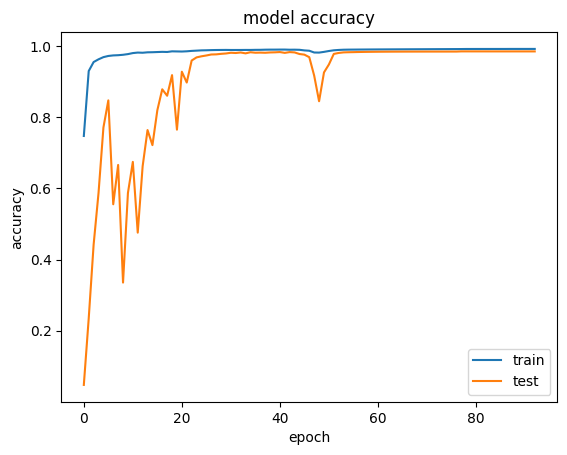

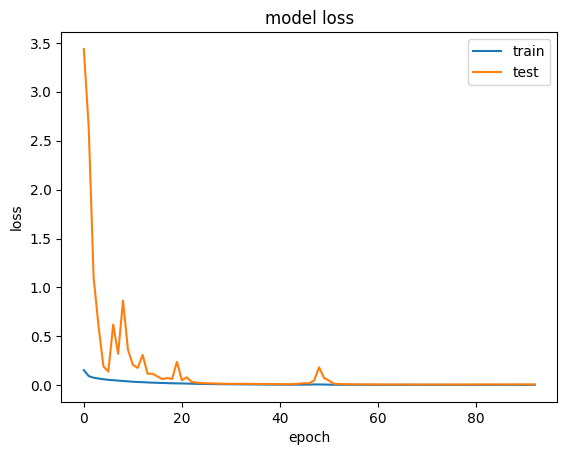

In [ ]:
# summarize history for accuracy
plt.plot(unet_history_df['accuracy'])
plt.plot(unet_history_df['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(unet_history_df['loss'])
plt.plot(unet_history_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Res-UNET

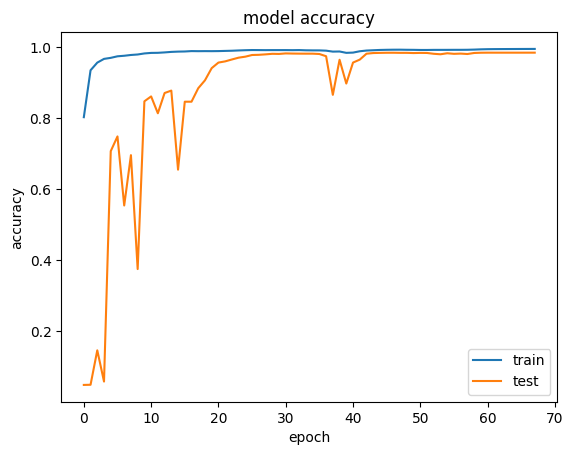

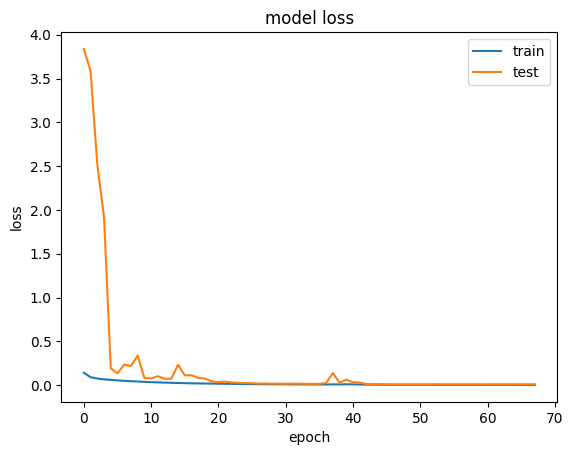

In [ ]:
# summarize history for accuracy
plt.plot(res_unet_history_df['accuracy'])
plt.plot(res_unet_history_df['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(res_unet_history_df['loss'])
plt.plot(res_unet_history_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Att-Res-UNET

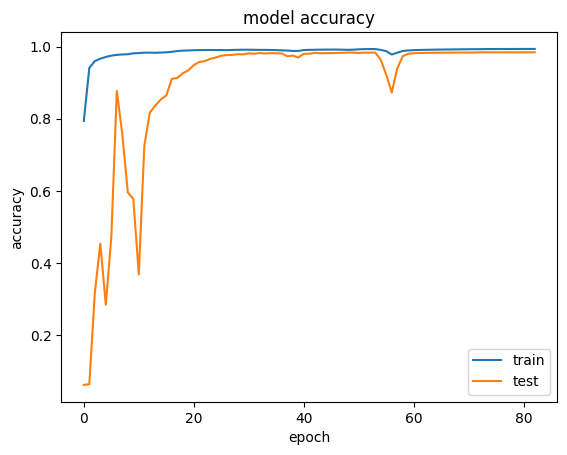

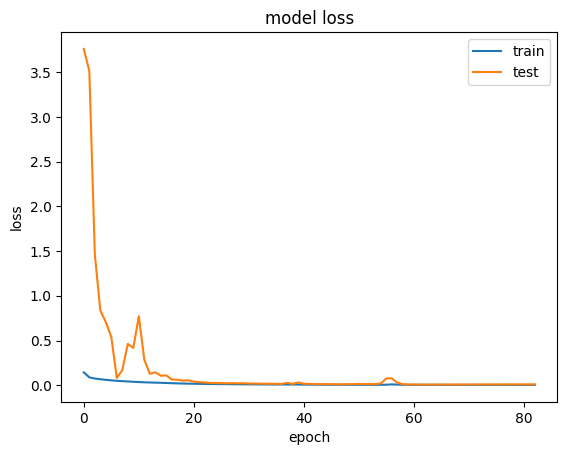

In [ ]:
# summarize history for accuracy
plt.plot(att_res_unet_history_df['accuracy'])
plt.plot(att_res_unet_history_df['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(att_res_unet_history_df['loss'])
plt.plot(att_res_unet_history_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Together

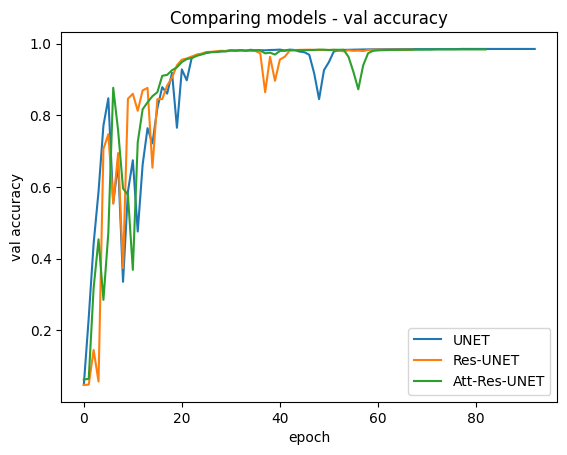

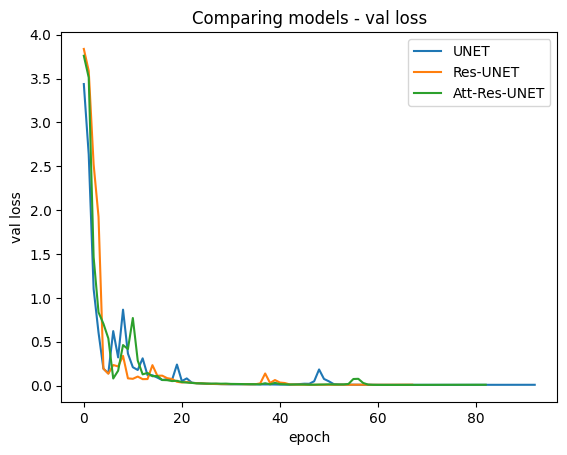

In [ ]:
# summarize history for accuracy
plt.plot(unet_history_df['val_accuracy'])
plt.plot(res_unet_history_df['val_accuracy'])
plt.plot(att_res_unet_history_df['val_accuracy'])

plt.title('Comparing models - val accuracy')
plt.ylabel('val accuracy')
plt.xlabel('epoch')
plt.legend(['UNET', 'Res-UNET', 'Att-Res-UNET'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(unet_history_df['val_loss'])
plt.plot(res_unet_history_df['val_loss'])
plt.plot(att_res_unet_history_df['val_loss'])

plt.title('Comparing models - val loss')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['UNET', 'Res-UNET', 'Att-Res-UNET'], loc='upper right')
plt.show()

## Evaluation

In [ ]:
unet_model = tf.keras.models.load_model(BASE_PATH + 'UNet_100epochs_focal_c_entropy_final_final.hdf5',custom_objects={'jacard_coef': jacard_coef, 'dice_coef': dice_coef})
res_unet_model = tf.keras.models.load_model(BASE_PATH + 'Res_UNet_100epochs_focal_c_entropy_final_final.hdf5', custom_objects={'jacard_coef': jacard_coef, 'dice_coef': dice_coef})
att_res_unet_model = tf.keras.models.load_model(BASE_PATH + 'Att_Res_UNet_100epochs_focal_c_entropy_final_final.hdf5', custom_objects={'jacard_coef': jacard_coef, 'dice_coef': dice_coef})

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def display_multilabel_confusion_matrix(Y_val, Y_pred, class_names):
    # Calculate the confusion matrix
    cmat = confusion_matrix(Y_val.flatten(), Y_pred.flatten())
    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(cmat, cmap=ListedColormap(['white']), annot=True, square=True, fmt='d', linewidth=2.,linecolor='black', cbar=False, xticklabels=class_names, yticklabels=class_names)
    # sns.heatmap(cmat/np.sum(cmat), cmap="Blues", annot=True, fmt='.2%', square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report for precision, recall, and F1-score for each class
    report = classification_report(Y_val.flatten(), Y_pred.flatten(), target_names=class_names)
    print(report)

In [ ]:
def precision_score_(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_pixel_pred = np.sum(pred_mask)
    precision = np.mean(intersect/total_pixel_pred)
    return round(precision, 3)

def recall_score_(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_pixel_truth = np.sum(groundtruth_mask)
    recall = np.mean(intersect/total_pixel_truth)
    return round(recall, 3)

def cal_accuracy(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    xor = np.sum(groundtruth_mask==pred_mask)
    acc = np.mean(xor/(union + xor - intersect))
    return round(acc, 3)

# def cal_dice_coef(groundtruth_mask, pred_mask):
#     intersect = np.sum(pred_mask*groundtruth_mask)
#     total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
#     dice = np.mean(2*intersect/total_sum)
#     return round(dice, 3) #round up to 3 decimal places

# def cal_dice_coef(groundtruth_mask, pred_mask, class_label):
#     # Calculate intersection and union for the specified class
#     intersect = np.sum((pred_mask == class_label) & (groundtruth_mask == class_label))
#     union = np.sum((pred_mask == class_label) | (groundtruth_mask == class_label))

#     # Ensure the denominator is not zero
#     if union == 0:
#         return 0.0

#     dice = 2.0 * intersect / union
#     return round(dice, 3)

def cal_dice_coef(groundtruth_mask, pred_mask, class_label):
    pred_mask_binary = (pred_mask == class_label).astype(np.uint8)
    groundtruth_mask_binary = (groundtruth_mask == class_label).astype(np.uint8)
    intersect = np.sum(pred_mask_binary * groundtruth_mask_binary)
    union = np.sum(pred_mask_binary) + np.sum(groundtruth_mask_binary)

    if union == 0:
        return 0.0

    dice = 2.0 * intersect / union
    return round(dice, 3)


# def iou(groundtruth_mask, pred_mask):
#     intersect = np.sum(pred_mask*groundtruth_mask)
#     union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
#     iou = np.mean(intersect/union)
#     return round(iou, 3)

# def iou(groundtruth_mask, pred_mask):
#     # Threshold masks to binary (0 or 1)
#     pred_mask_binary = (pred_mask > 0).astype(np.uint8)
#     groundtruth_mask_binary = (groundtruth_mask > 0).astype(np.uint8)

#     # Calculate intersection and union
#     intersect = np.sum(pred_mask_binary * groundtruth_mask_binary)
#     union = np.sum(pred_mask_binary) + np.sum(groundtruth_mask_binary) - intersect

#     # Calculate IoU
#     if union == 0:
#         return 0.0

#     iou = intersect / union
#     return round(iou, 3)

def iou(groundtruth_mask, pred_mask, class_label):
    # Threshold masks to binary (0 or 1) for the specified class
    pred_mask_binary = (pred_mask == class_label).astype(np.uint8)
    groundtruth_mask_binary = (groundtruth_mask == class_label).astype(np.uint8)

    # Calculate intersection and union
    intersect = np.sum(pred_mask_binary * groundtruth_mask_binary)
    union = np.sum(pred_mask_binary) + np.sum(groundtruth_mask_binary) - intersect

    # Calculate IoU
    if union == 0:
        return 0.0

    iou = intersect / union
    return round(iou, 3)



### UNET

In [ ]:
y_predict = unet_model.predict(X_test)

3/3 [==============================] - 19s 3s/step


In [ ]:
y_predict_int = np.array(y_predict).round().astype(int)

In [ ]:
y_predict_norm = np.argmax(y_predict_int, axis = 3)
y_test_norm = np.argmax(y_test, axis = 3)

In [ ]:
for i in range(4):
    print(f'IoU for class {i}: {iou(y_test_norm, y_predict_norm, class_label=i)}')

IoU for class 0: 0.987
IoU for class 1: 0.829
IoU for class 2: 0.807
IoU for class 3: 0.907


In [ ]:
for i in range(4):
    print(f'Dice for class {i}: {cal_dice_coef(y_test_norm, y_predict_norm, class_label = i)}')

Dice for class 0: 0.993
Dice for class 1: 0.906
Dice for class 2: 0.893
Dice for class 3: 0.951


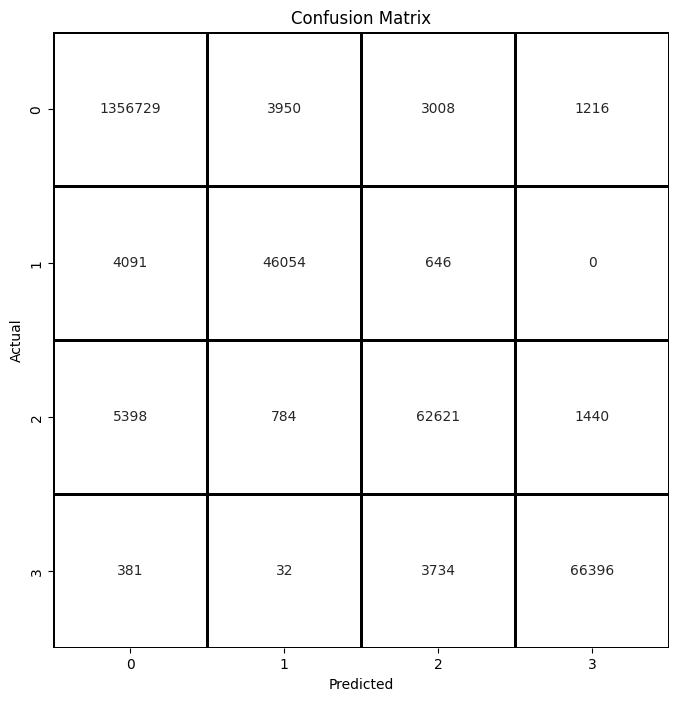

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1364903
           1       0.91      0.91      0.91     50791
           2       0.89      0.89      0.89     70243
           3       0.96      0.94      0.95     70543

    accuracy                           0.98   1556480
   macro avg       0.94      0.93      0.94   1556480
weighted avg       0.98      0.98      0.98   1556480



In [ ]:
display_multilabel_confusion_matrix(y_test_norm, y_predict_norm, class_names=[str(label) for label in [0, 1, 2, 3]])

In [ ]:
loss, accuracy, jaccard, dice = unet_model.evaluate(X_test, y_test)
print("Loss is {:.2f}%".format(loss*100))
print("Accuracy is {:.2f}%".format(accuracy*100))
print("Jaccard is {:.2f}%".format(jaccard*100))

3/3 [==============================] - 1s 146ms/step - loss: 0.0100 - accuracy: 0.9841 - jacard_coef: 0.6897 - dice_coef: 0.8163
Loss is 1.00%
Accuracy is 98.41%
Jaccard is 68.97%


Res-UNet

In [ ]:
y_predict = res_unet_model.predict(X_test)

3/3 [==============================] - 2s 486ms/step


In [ ]:
y_predict_int = np.array(y_predict).round().astype(int)

In [ ]:
y_predict_norm = np.argmax(y_predict_int, axis = 3)
y_test_norm = np.argmax(y_test, axis = 3)

In [ ]:
for i in range(4):
    print(f'IoU for class {i}: {iou(y_test_norm, y_predict_norm, class_label=i)}')

IoU for class 0: 0.987
IoU for class 1: 0.852
IoU for class 2: 0.799
IoU for class 3: 0.895


In [ ]:
for i in range(4):
    print(f'Dice for class {i}: {cal_dice_coef(y_test_norm, y_predict_norm, class_label = i)}')

Dice for class 0: 0.993
Dice for class 1: 0.92
Dice for class 2: 0.888
Dice for class 3: 0.944


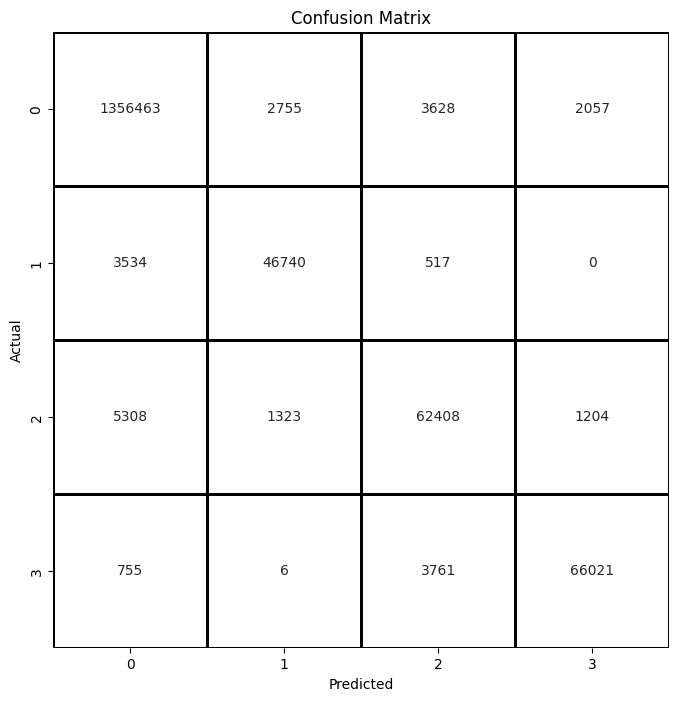

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1364903
           1       0.92      0.92      0.92     50791
           2       0.89      0.89      0.89     70243
           3       0.95      0.94      0.94     70543

    accuracy                           0.98   1556480
   macro avg       0.94      0.93      0.94   1556480
weighted avg       0.98      0.98      0.98   1556480



In [ ]:
display_multilabel_confusion_matrix(y_test_norm, y_predict_norm, class_names=[str(label) for label in [0, 1, 2, 3]])

In [ ]:
loss, accuracy, jaccard = res_unet_model.evaluate(X_test, y_test)
print("Loss is {:.2f}%".format(loss*100))
print("Accuracy is {:.2f}%".format(accuracy*100))
print("Jaccard is {:.2f}%".format(jaccard*100))

3/3 [==============================] - 1s 163ms/step - loss: 0.0109 - accuracy: 0.9841 - jacard_coef: 0.7134
Loss is 1.09%
Accuracy is 98.41%
Jaccard is 71.34%


Attention Res-UNet

In [ ]:
y_predict = att_res_unet_model.predict(X_test)

3/3 [==============================] - 5s 702ms/step


In [ ]:
y_predict_int = np.array(y_predict).round().astype(int)

In [ ]:
y_predict_norm = np.argmax(y_predict_int, axis = 3)
y_test_norm = np.argmax(y_test, axis = 3)

In [ ]:
for i in range(4):
    print(f'IoU for class {i}: {iou(y_test_norm, y_predict_norm, class_label=i)}')

IoU for class 0: 0.985
IoU for class 1: 0.831
IoU for class 2: 0.792
IoU for class 3: 0.895


In [ ]:
for i in range(4):
    print(f'Dice for class {i}: {cal_dice_coef(y_test_norm, y_predict_norm, class_label = i)}')

Dice for class 0: 0.993
Dice for class 1: 0.908
Dice for class 2: 0.884
Dice for class 3: 0.945


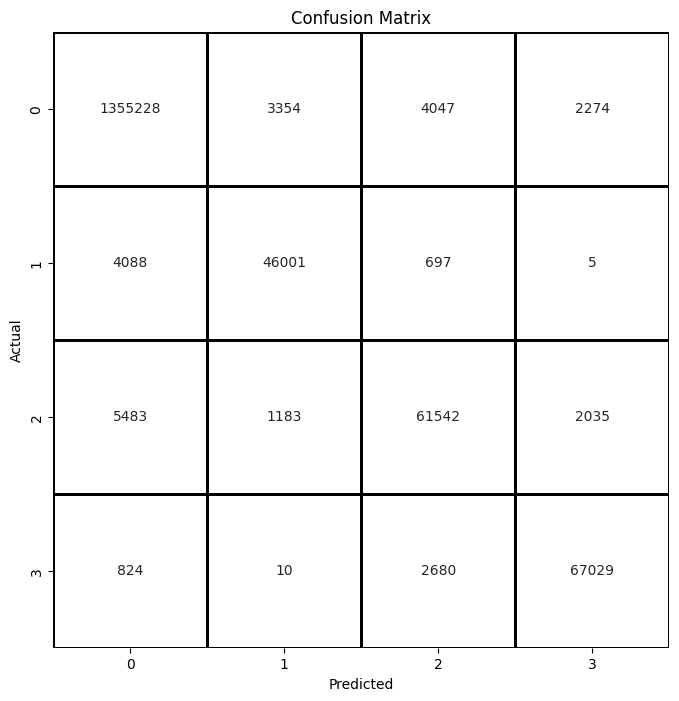

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1364903
           1       0.91      0.91      0.91     50791
           2       0.89      0.88      0.88     70243
           3       0.94      0.95      0.94     70543

    accuracy                           0.98   1556480
   macro avg       0.93      0.93      0.93   1556480
weighted avg       0.98      0.98      0.98   1556480



In [ ]:
display_multilabel_confusion_matrix(y_test_norm, y_predict_norm, class_names=[str(label) for label in [0, 1, 2, 3]])

In [ ]:
loss, accuracy, jaccard = att_res_unet_model.evaluate(X_test, y_test)
print("Loss is {:.2f}%".format(loss*100))
print("Accuracy is {:.2f}%".format(accuracy*100))
print("Jaccard is {:.2f}%".format(jaccard*100))

3/3 [==============================] - 2s 201ms/step - loss: 0.0144 - accuracy: 0.9828 - jacard_coef: 0.6540
Loss is 1.44%
Accuracy is 98.28%
Jaccard is 65.40%


0
1/1 [==============================] - 0s 491ms/step


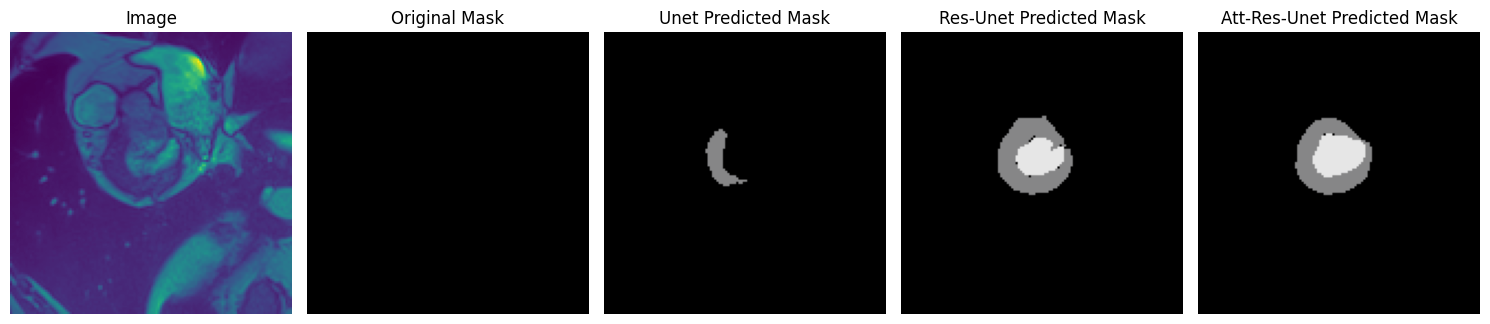

1
1/1 [==============================] - 0s 23ms/step


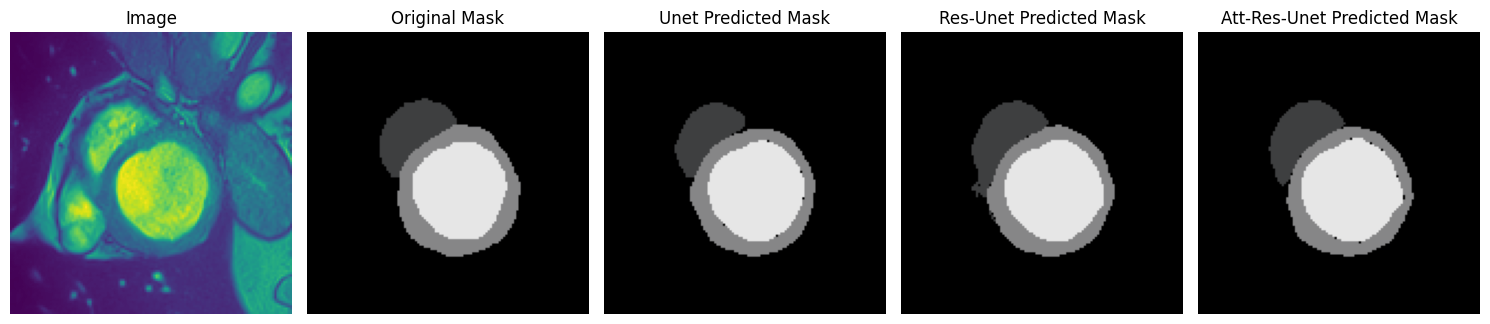

2
1/1 [==============================] - 0s 23ms/step


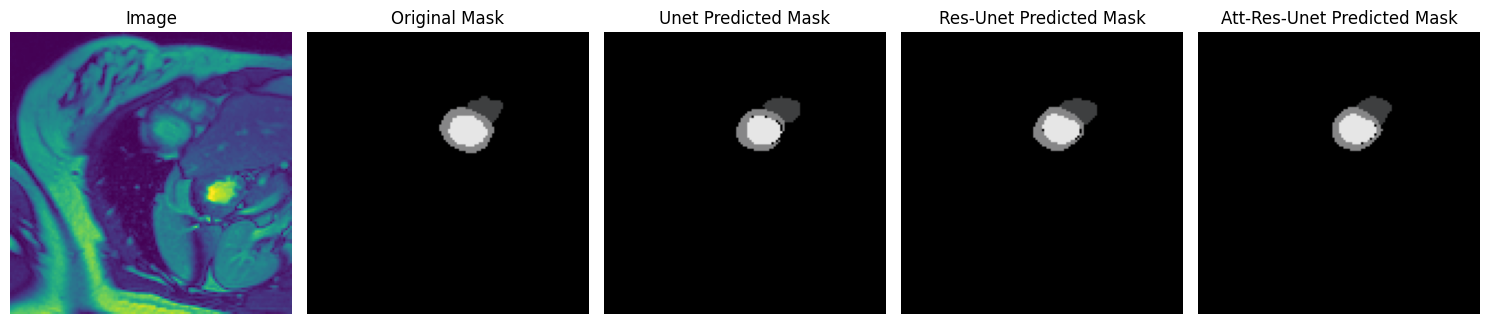

3
1/1 [==============================] - 0s 24ms/step


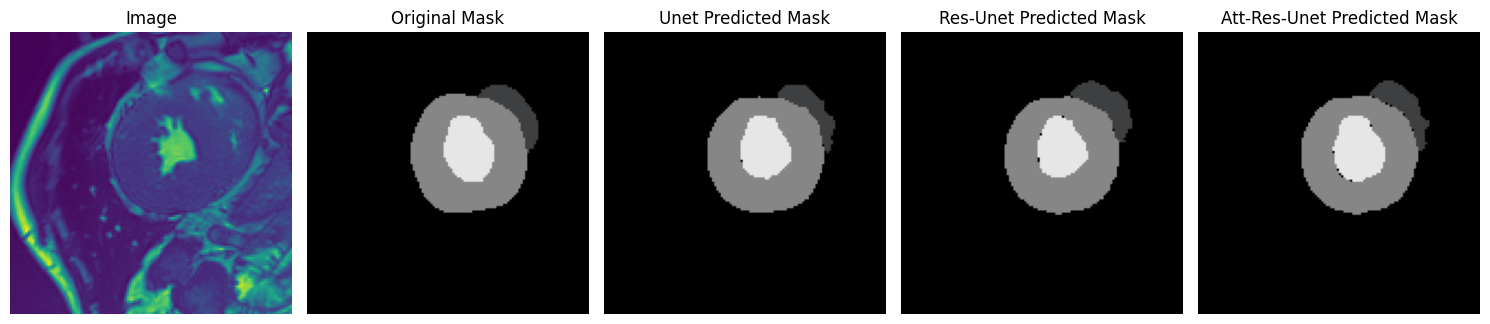

4
1/1 [==============================] - 0s 23ms/step


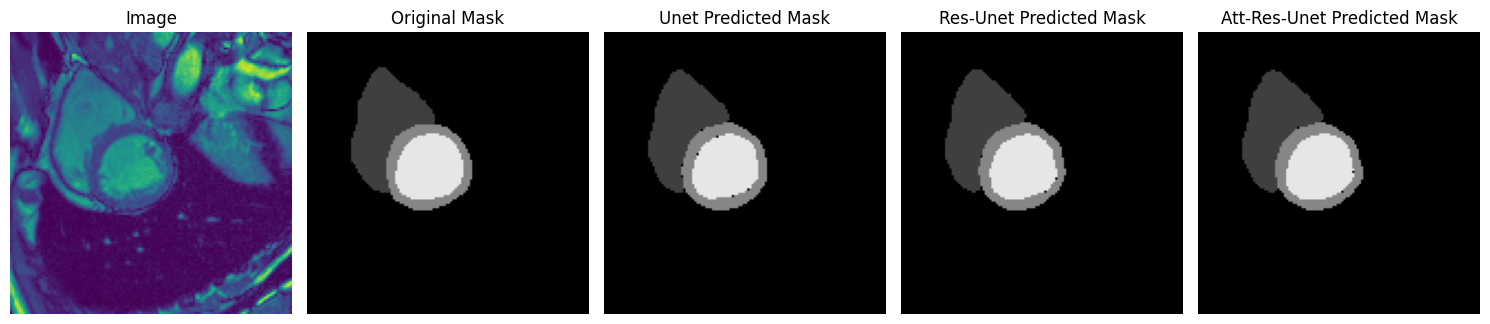

5
1/1 [==============================] - 0s 23ms/step


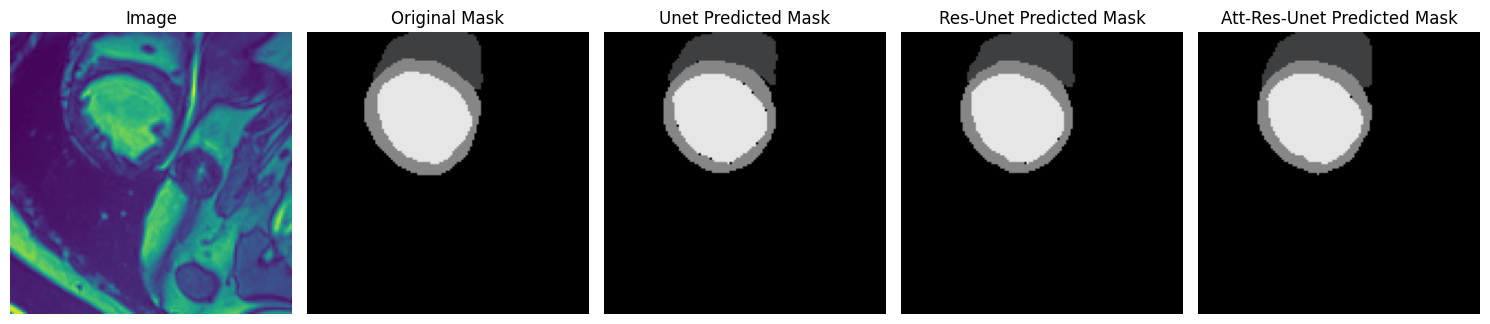

6
1/1 [==============================] - 0s 23ms/step


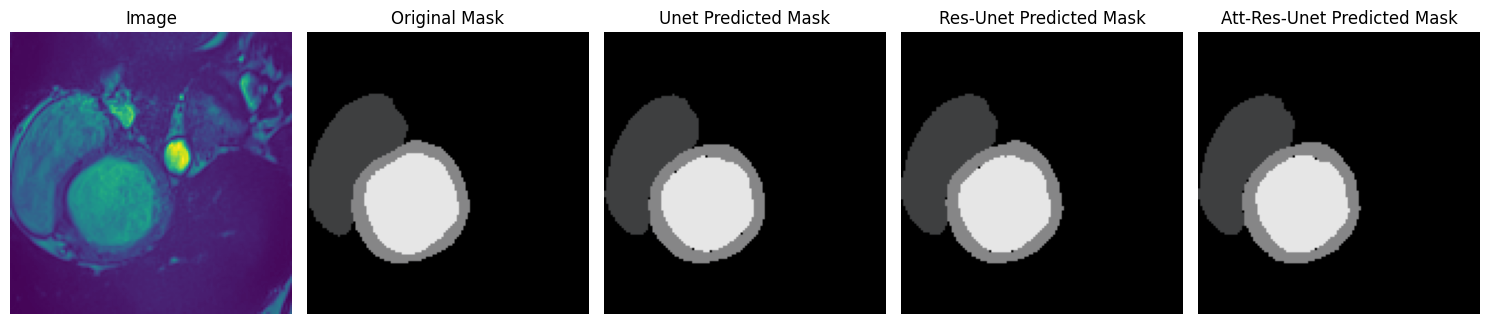

7
1/1 [==============================] - 0s 24ms/step


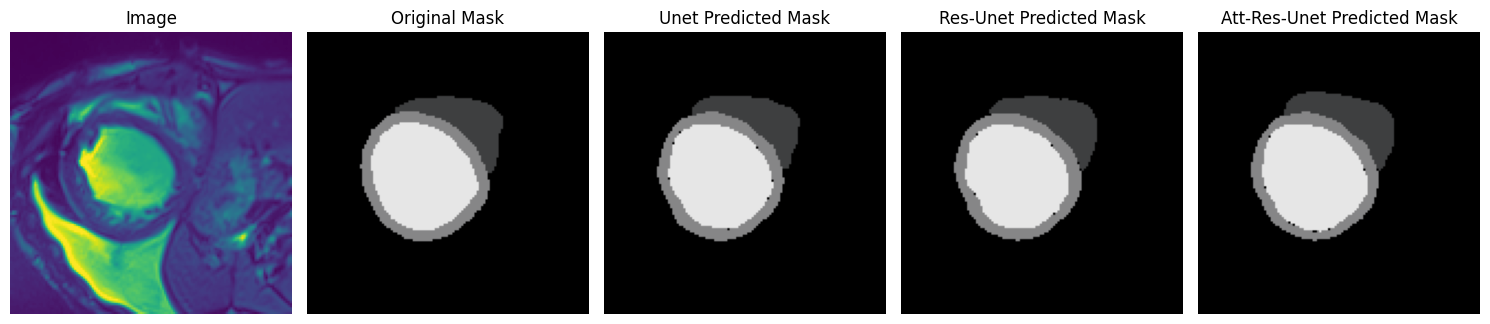

8
1/1 [==============================] - 0s 25ms/step


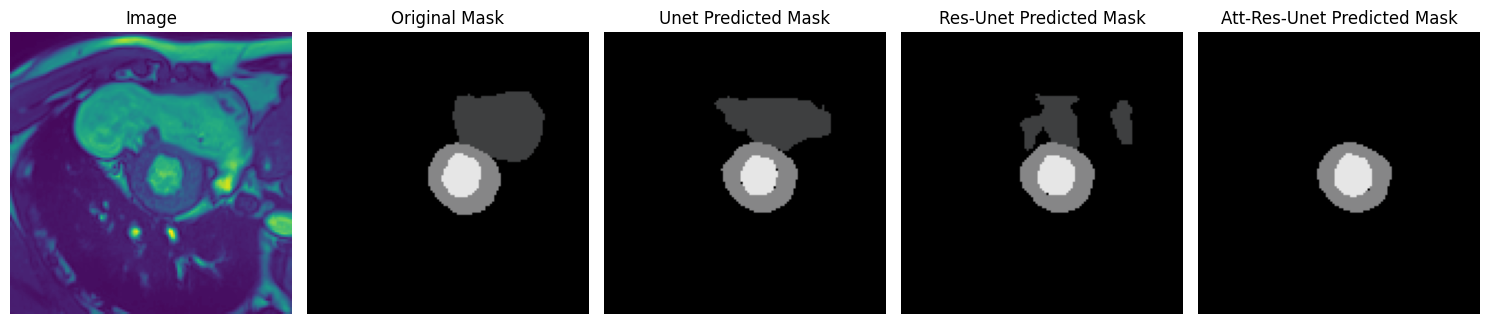

9
1/1 [==============================] - 0s 28ms/step


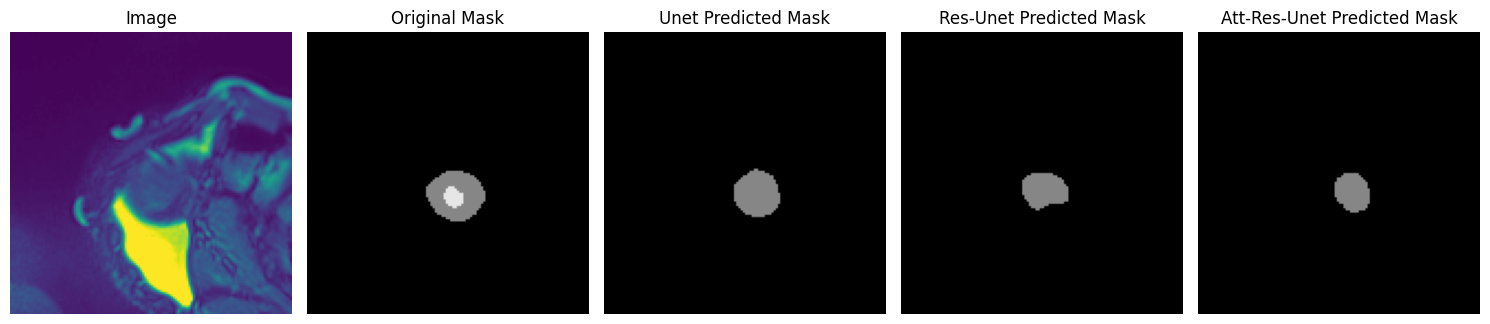

In [ ]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt

# Loop through each row in X_test
for index, img in enumerate(X_test[:10]):
    print(index)


    # img = read_image(img_path)

    # Load the original mask
    orig_mask = map_onehot_to_color(y_test[index], colormap)
    # orig_mask = y_test[index]

    # orig_mask = read_mask(orig_mask_path)

    # Create X array for prediction
    X = np.empty((1, 128, 128))
    X[0, ] = img

    # Make prediction of mask
    unet_predict = unet_model.predict(X)
    unet_pred_mask = np.array(unet_predict).squeeze().round()
    unet_pred_mask = map_onehot_to_color(unet_pred_mask, colormap)

    res_unet_predict = res_unet_model.predict(X)
    res_unet_pred_mask = np.array(res_unet_predict).squeeze().round()
    res_unet_pred_mask = map_onehot_to_color(res_unet_pred_mask, colormap)


    att_res_unet_predict = att_res_unet_model.predict(X)
    att_res_unet_pred_mask = np.array(att_res_unet_predict).squeeze().round()
    att_res_unet_pred_mask = map_onehot_to_color(att_res_unet_pred_mask, colormap)


    # Plotting the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(orig_mask, cmap='gray')
    plt.title('Original Mask')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(unet_pred_mask, cmap='gray')
    plt.title('Unet Predicted Mask')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(res_unet_pred_mask, cmap='gray')
    plt.title('Res-Unet Predicted Mask')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(att_res_unet_pred_mask, cmap='gray')
    plt.title('Att-Res-Unet Predicted Mask')
    plt.axis('off')



    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt

# Loop through each row in X_test
for index, img in enumerate(X_test[:20]):


    # img = read_image(img_path)

    # Load the original mask
    orig_mask = y_test[index]

    # orig_mask = read_mask(orig_mask_path)

    # Create X array for prediction
    X = np.empty((1, 128, 128))
    X[0, ] = img

    # Make prediction of mask
    predict = unet_model.predict(X)
    pred_mask = np.array(predict).squeeze().round()

    # Plotting the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(orig_mask, cmap='gray')
    plt.title('Original Mask')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(img)
    plt.imshow(orig_mask, alpha=0.5, cmap='jet')
    plt.title('Image with Original Mask')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(img)
    plt.imshow(pred_mask, alpha=0.5, cmap='jet')
    plt.title('Image with Predicted Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.